In [1]:
import tables_io
import numpy as np
import matplotlib.pyplot as plt
from rail.raruma import plotting_functions as raruma_plot
from rail.raruma import utility_functions as raruma_util


In [2]:
d = tables_io.read("/Users/echarles/pz/sandbox_data/roman_rubin_9925.hdf5")

In [3]:
d.keys()

odict_keys(['LSST_obs_g', 'LSST_obs_g_err', 'LSST_obs_i', 'LSST_obs_i_err', 'LSST_obs_r', 'LSST_obs_r_err', 'LSST_obs_u', 'LSST_obs_u_err', 'LSST_obs_y', 'LSST_obs_y_err', 'LSST_obs_z', 'LSST_obs_z_err', 'ROMAN_obs_F184', 'ROMAN_obs_H158', 'ROMAN_obs_J129', 'ROMAN_obs_K213', 'ROMAN_obs_R062', 'ROMAN_obs_W146', 'ROMAN_obs_Y106', 'ROMAN_obs_Z087', '_orientationAngle', 'bulge_frac', 'dec', 'diskHalfLightRadiusArcsec', 'galaxy_id', 'mag_g_lsst', 'mag_i_lsst', 'mag_r_lsst', 'mag_u_lsst', 'mag_y_lsst', 'mag_z_lsst', 'major', 'minor', 'orientationAngle', 'ra', 'redshift', 'spheroidHalfLightRadiusArcsec', 'totalEllipticity', 'totalEllipticity1', 'totalEllipticity2', 'totalHalfLightRadiusArcsec'])

In [4]:
train = tables_io.sliceObj(d, slice(0, -1, 2))
test = tables_io.sliceObj(d, slice(1, -1, 2))

In [6]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [7]:
reg = HistGradientBoostingRegressor(max_iter=5000)

In [8]:
train_targets, train_features = raruma_util.prepare_data_total_mag_and_colors(train, 'LSST_obs_{band}', 'ugrizy')
test_targets, test_features = raruma_util.prepare_data_total_mag_and_colors(test, 'LSST_obs_{band}', 'ugrizy')

In [9]:
from sklearn import preprocessing

In [10]:
scaler = preprocessing.StandardScaler().fit(train_features)

In [11]:
scaler.transform(train_features)

array([[-0.11473128,  0.25294704,  0.88081023, -0.05426437, -0.42913138,
         0.17496097],
       [ 0.85788801, -0.02943587,  0.91207213, -0.08414764, -1.08974739,
         1.22395112],
       [ 0.24353051,  0.47225749,  0.8737767 , -0.13126027, -1.09747126,
        -0.57884199],
       ...,
       [ 0.42931408,  0.04035662,  0.65699953, -0.29558914, -0.51478644,
         1.63778451],
       [-0.05504769,  0.91462265, -1.14627299, -1.80695871, -1.45472433,
        -0.69225677],
       [-0.1824171 , -0.61756733, -1.56022229, -2.17625553, -1.8071096 ,
        -0.34740394]], shape=(256887, 6))

In [12]:
scaled = scaler.transform(train_features).clip(-5, 5)

In [13]:
train_features[0:,0].min()

np.float64(13.121183843089646)

In [14]:
train_features.shape

(256887, 6)

In [15]:
# from sklearn.cluster import DBSCAN

# db = DBSCAN(eps=0.3, min_samples=10)
# db.fit(train_features)

In [16]:
# labels = np.array(db.labels_)

In [17]:
# np.bincount(labels+1)

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=scaled.shape[-1], whiten=False)

In [20]:
pca.fit(scaled.clip(-5, 5))

PCA(n_components=6)

In [21]:
pca.explained_variance_ratio_

array([0.42251202, 0.19182578, 0.14570983, 0.11052694, 0.0853657 ,
       0.04405973])

In [22]:
pca_out = pca.transform(scaled)

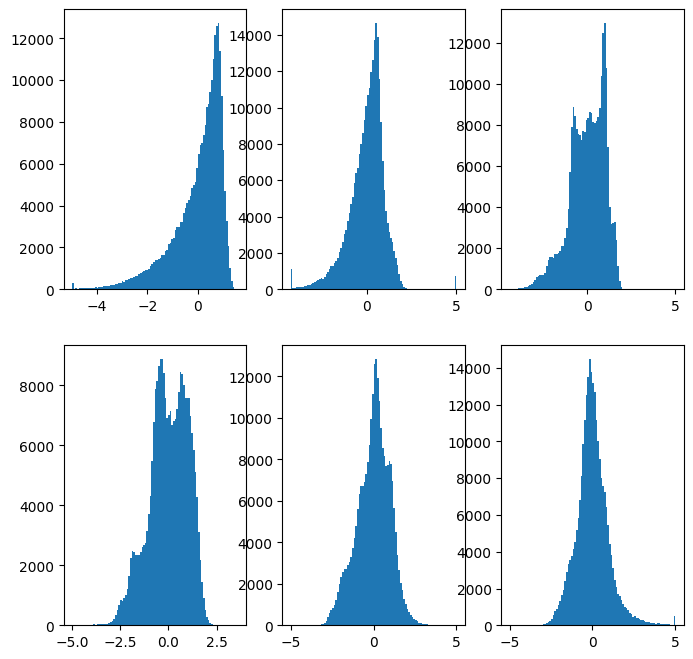

In [23]:
fig = raruma_plot.plot_feature_histograms(scaled)

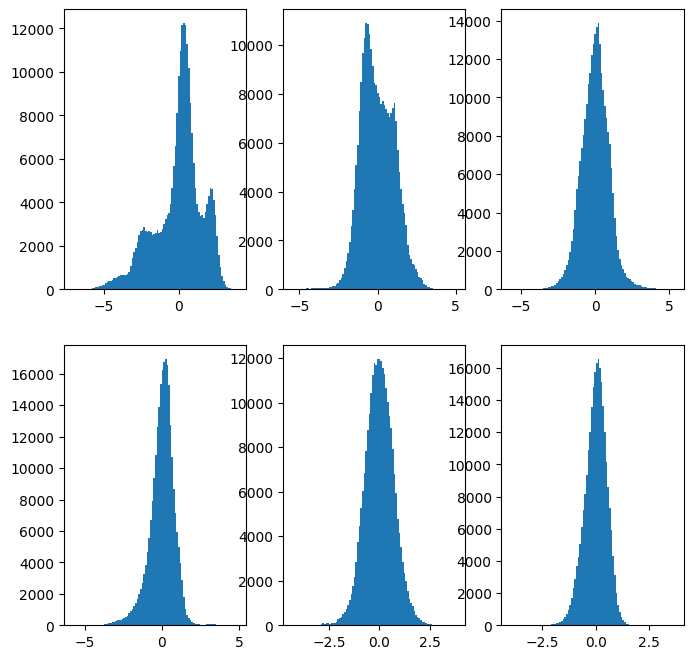

In [24]:
fig = raruma_plot.plot_feature_histograms(pca_out)

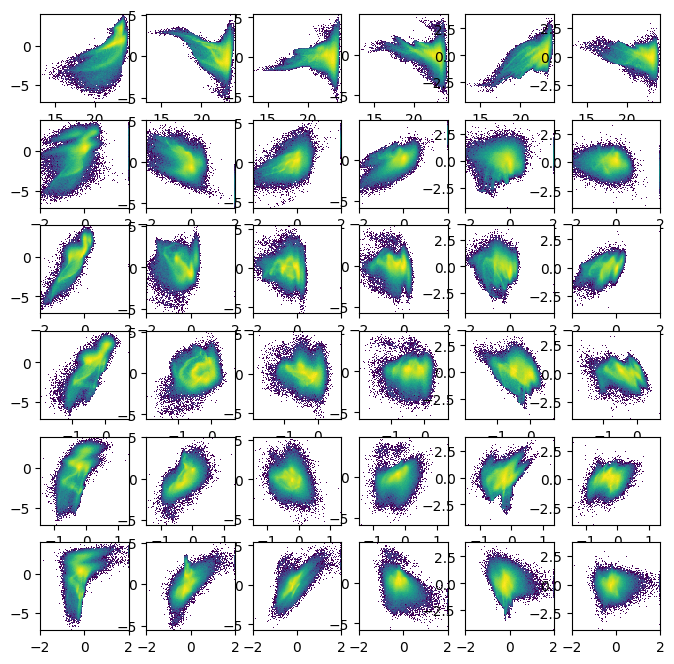

In [25]:
_ = raruma_plot.plot_pca_hist2d(train_features, pca_out)

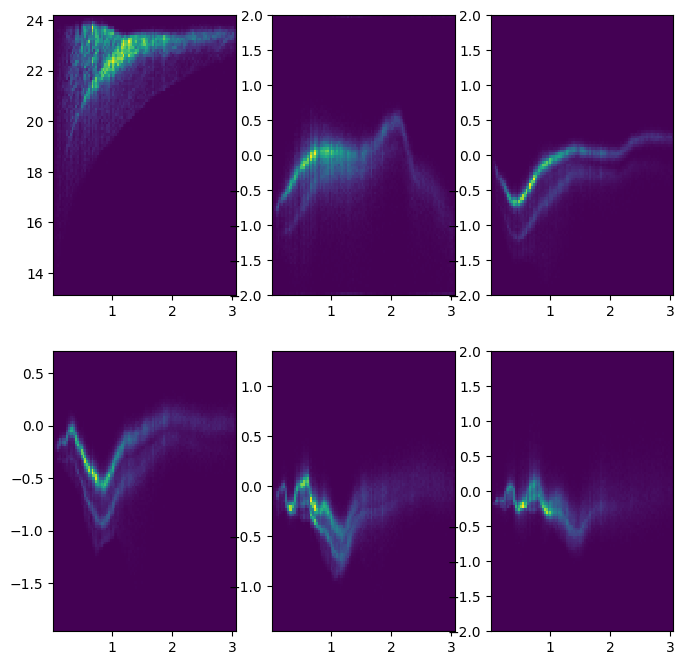

In [27]:
_ = raruma_plot.plot_feature_target_hist2d(train_features, train_targets)

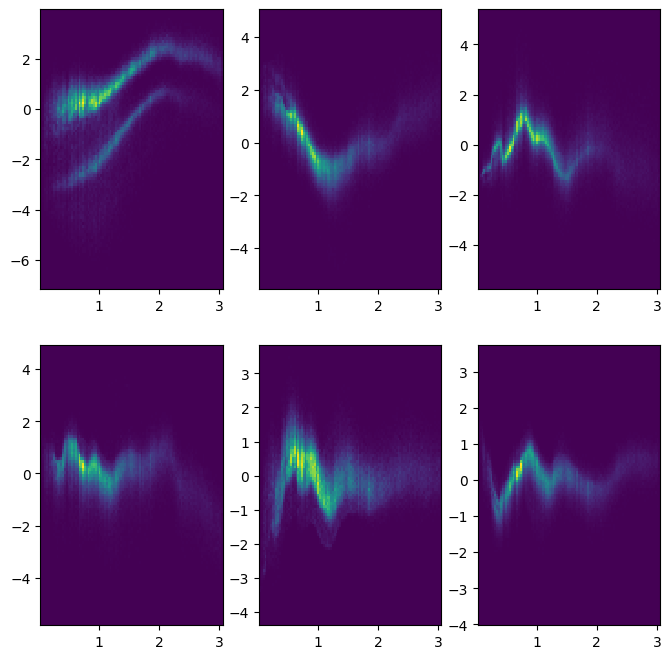

In [28]:
_ = raruma_plot.plot_feature_target_hist2d(pca_out, train_targets)

In [29]:
# _ = raruma_plot.plot_features_target_scatter(pca_out, train_targets)

In [31]:
preds = raruma_util.run_regression(reg, train_features, train_targets, test_features)

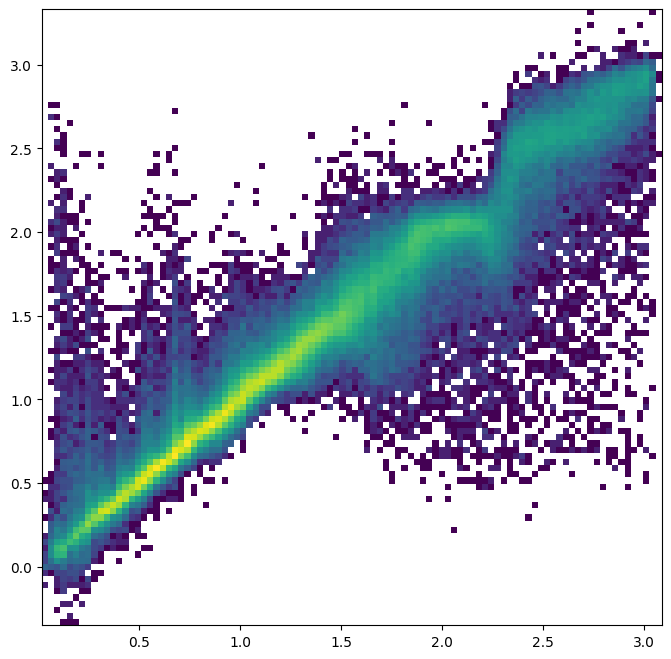

In [32]:
_ = raruma_plot.plot_true_predict(test_targets, preds)